In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contractions
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, f1_score, classification_report

In [2]:
rawdf = pd.read_csv("tweet_data.csv")
rawdf

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785911,1147325851614117888,2019-07-06 02:06:13,-1,-1,3,False,True,True,1,NaN,2,542154137,Relations are DIFFERENT\nnot DIFFICULT.,Motivational,85625,542154137,Wit & Wisdom 💯,NaN
785912,1153184058714624001,2019-07-22 06:04:39,-1,-1,867,False,True,True,561,https://pbs.twimg.com/media/EADuxohU8AAQo8G.jpg,306,858516111410647040,"""to live a creative life, we must lose our fea...",Interesting,208417,2920686840,DeepFeling™,NaN
785913,1153048802116292608,2019-07-21 21:07:11,-1,-1,4605,False,True,True,4253,NaN,352,3282859598,Who's your comic crush? https://t.co/H29dhXw3kf,Memes,7024207,436266454,Twitter Movies,https://video.twimg.com/amplify_video/11530474...
785914,1154063052997836801,2019-07-24 16:17:27,-1,-1,5638,True,True,False,4996,https://pbs.twimg.com/media/EAQOObJWwAASaxj.jpg,642,-1,"After a flight of 195 hours, 18 minutes, 35 se...",Random,32030797,11348282,NASA,NaN


In [3]:
revieweddf = rawdf[(rawdf["edInput"] != -1) & (rawdf["edInput"] != 3)]
revieweddf

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
721,1070970722598707200,2018-12-07 09:18:12,1,5001,5137,True,True,False,4180,https://pbs.twimg.com/media/DtzaMK_W4AE6Vle.jpg,957,-1,Which one would you choose? 👀 https://t.co/U0s...,Fashion,37293,1061553474918342656,Gentleman’s style,NaN
1374,1070981773616648193,2018-12-07 10:02:07,1,5003,52650,True,True,True,36349,NaN,16301,781427301472874497,How it’s made. 😊 https://t.co/3XjOw4gIkg,Interesting,34897,994950431234080768,Satisfying Slime,https://video.twimg.com/ext_tw_video/107097772...
1867,916500037818916866,2017-10-07 03:06:51,2,5003,63872,False,True,True,39698,NaN,24174,821811651393495040,"Smile, because it confuses people. Smile, beca...",Interesting,966840,482658470,Tips & Tricks Ideas ✌,NaN
2206,1071135340696625152,2018-12-07 20:12:20,1,5001,1714,True,True,False,1261,https://pbs.twimg.com/media/Dt1v6O9XgAIXOrR.jpg,453,-1,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡 https://t.co/WdavWJcSyw,Art,33308,762649146,𝐴𝑟𝑡.,NaN
2263,1071141175606829056,2018-12-07 20:35:31,1,5001,62062,True,True,False,49073,NaN,12989,-1,Baby Alpacas are so under appreciated. https:/...,Animal,1052924,2828212668,Nature is Amazing ☘️,https://video.twimg.com/ext_tw_video/107114109...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785850,1153952965650079744,2019-07-24 09:00:01,1,5005,20,True,True,True,10,https://pbs.twimg.com/media/D_h05AQXYAArdka.jpg,10,3197789991,Apply for a grant to implement plant conservat...,Flowers,5430,8224502,BGCI,NaN
785854,1154059414174703617,2019-07-24 16:03:00,2,5004,79,False,True,True,64,NaN,15,20562637,Are you team Shake Shack or team In-N-Out? htt...,Business,214552,4805771380,FOOD INSIDER,https://video.twimg.com/amplify_video/10376357...
785863,1154061474383441920,2019-07-24 16:11:11,1,5007,8,True,True,True,7,https://pbs.twimg.com/media/EAQMyyyXkAAQocF.jpg,1,529501969,How @OlafurEliasson's 'hedonistic' dad helped ...,Art,57448,187869078,Phaidon,NaN
785871,1154130836217683968,2019-07-24 20:46:48,1,5007,15,True,True,True,9,NaN,6,314542577,I am delighted that @IfOnly and @Sothebys are ...,Art,102499,113509194,Alice Waters,NaN


In [4]:
fitnessdf = revieweddf[revieweddf["topicName"] == "Fitness"]
fitnessdf

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
41692,1077357978918027265,2018-12-25 00:18:53,1,5001,222,True,True,False,188,NaN,34,-1,"Next time you hit the gym, try supersetting to...",Fitness,4524792,25093616,Men's Health Mag,NaN
41904,1077406076159619073,2018-12-25 03:30:00,1,5001,524,True,True,False,420,NaN,104,-1,"""The movement seems simple, but so much can go...",Fitness,966432,834281252,CrossFit,https://video.twimg.com/amplify_video/74420647...
42733,1077594821848530947,2018-12-25 16:00:00,1,5001,241,True,True,False,190,NaN,51,-1,Are you sure you're doing dumbbell curls corre...,Fitness,4524800,25093616,Men's Health Mag,https://video.twimg.com/amplify_video/10649015...
43152,1077661590038765568,2018-12-25 20:25:19,1,5001,446,True,True,False,381,NaN,65,-1,Build abs like a brick wall with this move. ht...,Fitness,4524768,25093616,Men's Health Mag,NaN
43461,1077722265310162944,2018-12-26 00:26:25,2,5001,183,False,True,False,152,NaN,31,-1,"""Lift your nuts to your guts."" https://t.co/Eq...",Fitness,4524752,25093616,Men's Health Mag,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161995,1092139490930495490,2019-02-03 19:15:20,2,5001,14,False,True,False,8,NaN,6,-1,6 Dietitian-Approved Ways to Snack Smarter htt...,Fitness,1481708,14562016,FITNESS Magazine,NaN
161996,1092135801977298950,2019-02-03 19:00:40,1,5001,14,True,True,False,9,NaN,5,-1,What I Learned from Weighing Less Than 100 Pou...,Fitness,1481708,14562016,FITNESS Magazine,NaN
162074,1092147052912566272,2019-02-03 19:45:23,2,5001,10,False,True,False,5,https://pbs.twimg.com/media/DygV9OlXgAUJVwc.jpg,5,-1,8 Healthy Homemade Granola Bars https://t.co/s...,Fitness,1481710,14562016,FITNESS Magazine,NaN
162075,1092144313004367875,2019-02-03 19:34:29,2,5001,7,False,True,False,5,NaN,2,-1,Here's what happened. https://t.co/7FvLjzFJLI,Fitness,4585154,25087685,Women's Health,NaN


Proportion of tweets without attached photos compared to those with attached photos.

<AxesSubplot:>

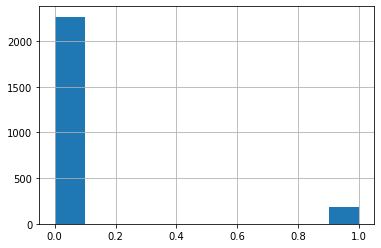

In [5]:
(fitnessdf.photoUrl.notna() * 1).hist()

Proportion of correctly labeled and incorrectly labeled tweets.

<AxesSubplot:>

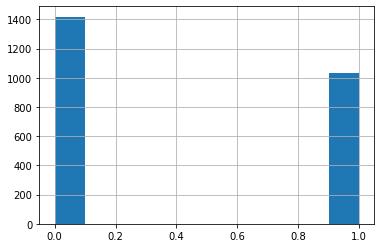

In [6]:
labels = fitnessdf.edInput.map({2:0, 4:1, 1:1})
labels.hist()

In [7]:
stopwords_english = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.stem.PorterStemmer()
nourls = fitnessdf.text.str.replace(r"http\S*", "", regex = True).str.replace(r"@\S*", "", regex = True)
nourls.head(10)

41692    Next time you hit the gym, try supersetting to...
41904    "The movement seems simple, but so much can go...
42733    Are you sure you're doing dumbbell curls corre...
43152         Build abs like a brick wall with this move. 
43461                      "Lift your nuts to your guts." 
43525    Want bigger, stronger shoulders? Nail this mov...
44489    This move is part of a plan that can help you ...
44695       Your waistline — and wallet — will thank you. 
44747                   You can lift more than you think. 
45463      Fit girls for the win. #WomenCrushingWednesday 
Name: text, dtype: object

Distribution of word counts of tweets in dataset.

In [8]:
nourls.str.split().str.len().describe()

count    2449.000000
mean       10.340139
std         6.735238
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        52.000000
Name: text, dtype: float64

<AxesSubplot:>

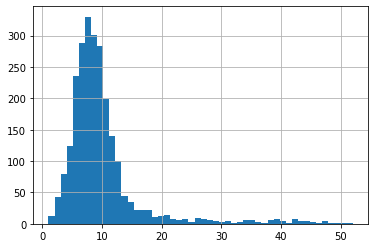

In [9]:
nourls.str.split().str.len().hist(bins=50)

In [10]:
nopunct = nourls.str.replace("-", " ", regex=False).str.replace('[^A-Za-z\s]+', '', regex=True)
nopunct.head(10)

41692    Next time you hit the gym try supersetting to ...
41904    The movement seems simple but so much can go w...
42733    Are you sure youre doing dumbbell curls correc...
43152          Build abs like a brick wall with this move 
43461                         Lift your nuts to your guts 
43525    Want bigger stronger shoulders Nail this move ...
44489    This move is part of a plan that can help you ...
44695          Your waistline  and wallet  will thank you 
44747                    You can lift more than you think 
45463        Fit girls for the win WomenCrushingWednesday 
Name: text, dtype: object

In [11]:
X1, X_test1, y1, y_test1 = train_test_split(nopunct, labels, test_size=0.2, random_state=42)
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X1, y1, test_size=0.25, random_state=42)
print(X_train1.shape)
print(y_train1.shape)
print(X_valid1.shape)
print(y_valid1.shape)
print(X_test1.shape)
print(y_test1.shape)

(1469,)
(1469,)
(490,)
(490,)
(490,)
(490,)


In [12]:
tfidf = TfidfVectorizer(strip_accents="unicode")
tfidf.fit(X_train1)
tfidf_X_train1, tfidf_X_valid1 = tfidf.transform(X_train1), tfidf.transform(X_valid1)
print(tfidf_X_train1.shape)
print(tfidf_X_valid1.shape)

(1469, 2881)
(490, 2881)


In [13]:
basicNB = MultinomialNB()
basicNB.fit(tfidf_X_train1, y_train1)
print("Naive Bayes Training Set F1 Score:", f1_score(y_train1, basicNB.predict(tfidf_X_train1)))
print("Naive Bayes Validation Set F1 Score:", f1_score(y_valid1, basicNB.predict(tfidf_X_valid1)))

Naive Bayes Training Set F1 Score: 0.9046793760831888
Naive Bayes Validation Set F1 Score: 0.7302452316076296


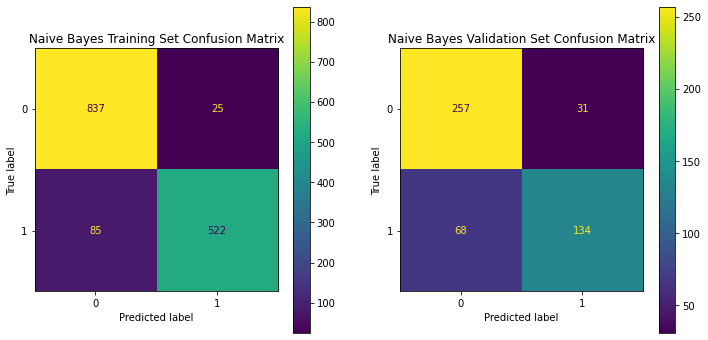

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_train1, y_train1, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_valid1, y_valid1, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set Confusion Matrix")
axs[1].set_title("Naive Bayes Validation Set Confusion Matrix")
plt.show()

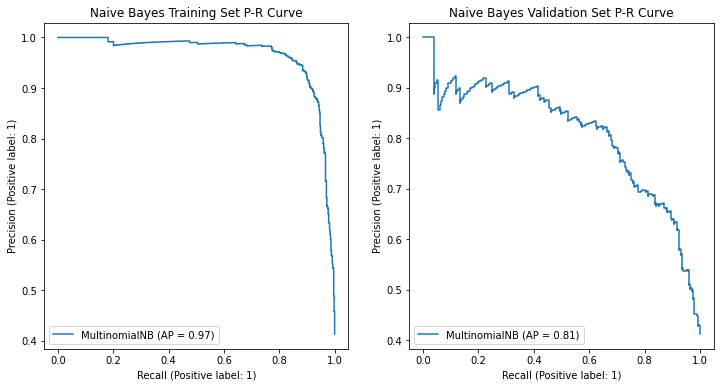

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_train1, y_train1, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_valid1, y_valid1, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set P-R Curve")
axs[1].set_title("Naive Bayes Validation Set P-R Curve")
plt.show()

In [16]:
nocontractions = nourls.str.replace("-", " ", regex=False).apply(lambda x: " ".join([w for w in nltk.word_tokenize(contractions.fix(x, slang=False))])).str.replace('[^A-Za-z\s]+', '', regex=True)
nocontractions.head(10)

41692    Next time you hit the gym  try supersetting to...
41904     The movement seems simple  but so much can go...
42733    Are you sure you are doing dumbbell curls corr...
43152          Build abs like a brick wall with this move 
43461                        Lift your nuts to your guts  
43525    Want bigger  stronger shoulders  Nail this mov...
44489    This move is part of a plan that can help you ...
44695          Your waistline  and wallet  will thank you 
44747                    You can lift more than you think 
45463       Fit girls for the win   WomenCrushingWednesday
Name: text, dtype: object

In [17]:
X2, X_test2, y2, y_test2 = train_test_split(nocontractions, labels, test_size=0.2, random_state=42)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2, test_size=0.25, random_state=42)
print(X_train2.shape)
print(y_train2.shape)
print(X_valid2.shape)
print(y_valid2.shape)
print(X_test2.shape)
print(y_test2.shape)

(1469,)
(1469,)
(490,)
(490,)
(490,)
(490,)


In [18]:
tfidf.fit(X_train2)
tfidf_X_train2, tfidf_X_valid2 = tfidf.transform(X_train2), tfidf.transform(X_valid2)
print(tfidf_X_train2.shape)
print(tfidf_X_valid2.shape)

(1469, 2831)
(490, 2831)


In [19]:
basicNB.fit(tfidf_X_train2, y_train2)
print("Naive Bayes Training Set F1 Score:", f1_score(y_train2, basicNB.predict(tfidf_X_train2)))
print("Naive Bayes Validation Set F1 Score:", f1_score(y_valid2, basicNB.predict(tfidf_X_valid2)))

Naive Bayes Training Set F1 Score: 0.8986013986013985
Naive Bayes Validation Set F1 Score: 0.7217630853994491


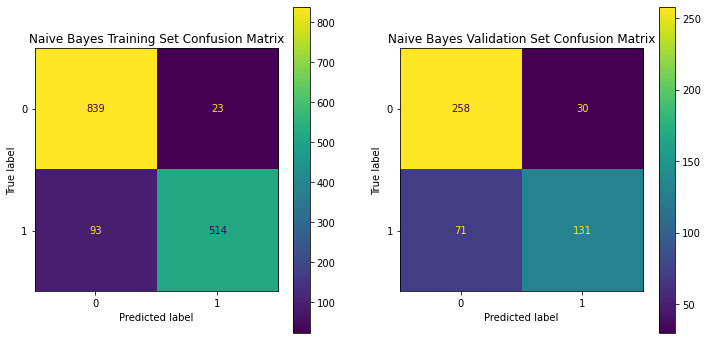

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_train2, y_train2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set Confusion Matrix")
axs[1].set_title("Naive Bayes Validation Set Confusion Matrix")
plt.show()

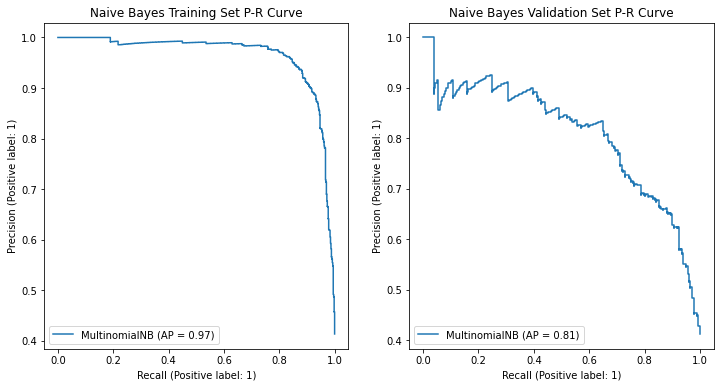

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_train2, y_train2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set P-R Curve")
axs[1].set_title("Naive Bayes Validation Set P-R Curve")
plt.show()

In [22]:
stemmed = nourls.str.replace("-", " ", regex=False).apply(lambda x: " ".join([stemmer.stem(w, to_lowercase=False) for w in nltk.word_tokenize(contractions.fix(x, slang=False))])).str.replace('[^A-Za-z\s]+', '', regex=True)
stemmed.head(10)

41692    Next time you hit the gym  tri superset to bui...
41904     The movement seem simpl  but so much can go w...
42733      Are you sure you are do dumbbel curl correctli 
43152            Build ab like a brick wall with thi move 
43461                          Lift your nut to your gut  
43525    Want bigger  stronger shoulder  Nail thi move ...
44489    Thi move is part of a plan that can help you l...
44695           Your waistlin  and wallet  will thank you 
44747                    You can lift more than you think 
45463        Fit girl for the win   WomenCrushingWednesday
Name: text, dtype: object

In [23]:
X3, X_test3, y3, y_test3 = train_test_split(stemmed, labels, test_size=0.2, random_state=42)
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X3, y3, test_size=0.25, random_state=42)
print(X_train3.shape)
print(y_train3.shape)
print(X_valid3.shape)
print(y_valid3.shape)
print(X_test3.shape)
print(y_test3.shape)

(1469,)
(1469,)
(490,)
(490,)
(490,)
(490,)


In [24]:
tfidf.fit(X_train3)
tfidf_X_train3, tfidf_X_valid3 = tfidf.transform(X_train3), tfidf.transform(X_valid3)
print(tfidf_X_train3.shape)
print(tfidf_X_valid3.shape)

(1469, 2379)
(490, 2379)


In [25]:
basicNB.fit(tfidf_X_train3, y_train3)
print("Naive Bayes Training Set F1 Score:", f1_score(y_train3, basicNB.predict(tfidf_X_train3)))
print("Naive Bayes Validation Set F1 Score:", f1_score(y_valid3, basicNB.predict(tfidf_X_valid3)))

Naive Bayes Training Set F1 Score: 0.8904347826086957
Naive Bayes Validation Set F1 Score: 0.746031746031746


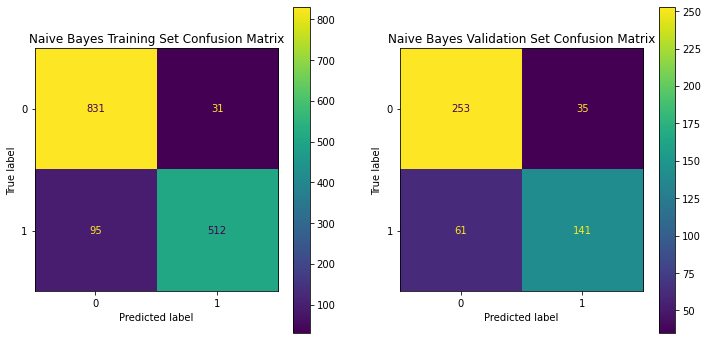

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_train3, y_train3, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_valid3, y_valid3, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set Confusion Matrix")
axs[1].set_title("Naive Bayes Validation Set Confusion Matrix")
plt.show()

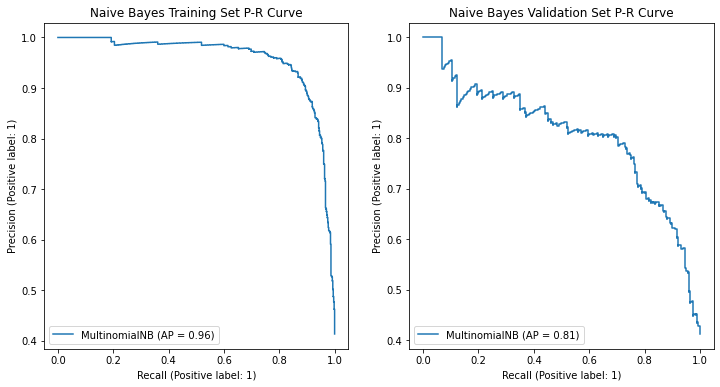

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_train3, y_train3, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_valid3, y_valid3, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set P-R Curve")
axs[1].set_title("Naive Bayes Validation Set P-R Curve")
plt.show()

In [28]:
nostops = nourls.str.replace("-", " ", regex=False).apply(lambda x: " ".join([w for w in nltk.word_tokenize(contractions.fix(x, slang=False)) if w not in stopwords_english])).str.replace('[^A-Za-z\s]+', '', regex=True)
nostops.head(10)

41692    Next time hit gym  try supersetting build muscle 
41904     The movement seems simple  much go wrong  Dou...
42733                   Are sure dumbbell curls correctly 
43152                      Build abs like brick wall move 
43461                                     Lift nuts guts  
43525      Want bigger  stronger shoulders  Nail move way 
44489      This move part plan help lose     even  pounds 
44695                       Your waistline  wallet  thank 
44747                                      You lift think 
45463               Fit girls win   WomenCrushingWednesday
Name: text, dtype: object

In [29]:
X4, X_test4, y4, y_test4 = train_test_split(nostops, labels, test_size=0.2, random_state=42)
X_train4, X_valid4, y_train4, y_valid4 = train_test_split(X4, y4, test_size=0.25, random_state=42)
print(X_train4.shape)
print(y_train4.shape)
print(X_valid4.shape)
print(y_valid4.shape)
print(X_test4.shape)
print(y_test4.shape)

(1469,)
(1469,)
(490,)
(490,)
(490,)
(490,)


In [30]:
tfidf.fit(X_train4)
tfidf_X_train4, tfidf_X_valid4 = tfidf.transform(X_train4), tfidf.transform(X_valid4)
print(tfidf_X_train4.shape)
print(tfidf_X_valid4.shape)

(1469, 2820)
(490, 2820)


In [31]:
basicNB.fit(tfidf_X_train4, y_train4)
print("Naive Bayes Training Set F1 Score:", f1_score(y_train4, basicNB.predict(tfidf_X_train4)))
print("Naive Bayes Validation Set F1 Score:", f1_score(y_valid4, basicNB.predict(tfidf_X_valid4)))

Naive Bayes Training Set F1 Score: 0.9101796407185628
Naive Bayes Validation Set F1 Score: 0.7526315789473684


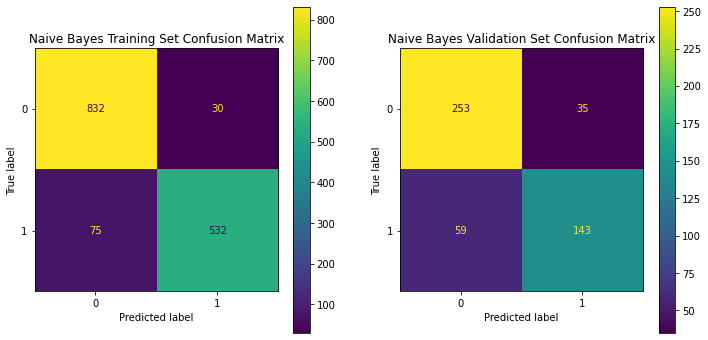

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_train4, y_train4, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_valid4, y_valid4, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set Confusion Matrix")
axs[1].set_title("Naive Bayes Validation Set Confusion Matrix")
plt.show()

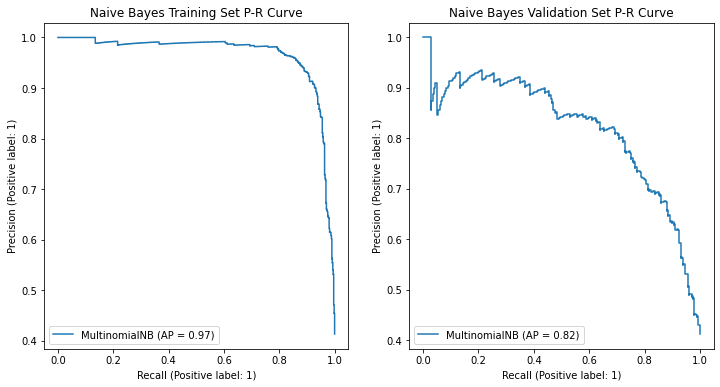

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_train4, y_train4, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_valid4, y_valid4, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set P-R Curve")
axs[1].set_title("Naive Bayes Validation Set P-R Curve")
plt.show()

In [34]:
cleaned = nourls.str.replace("-", " ", regex=False).apply(lambda x: " ".join([stemmer.stem(w, to_lowercase=False) for w in nltk.word_tokenize(contractions.fix(x, slang=False)) if w not in stopwords_english])).str.replace('[^A-Za-z\s]+', '', regex=True)
cleaned.head(10)

41692         Next time hit gym  tri superset build muscl 
41904     The movement seem simpl  much go wrong  Doubl...
42733                     Are sure dumbbel curl correctli 
43152                       Build ab like brick wall move 
43461                                       Lift nut gut  
43525       Want bigger  stronger shoulder  Nail move way 
44489        Thi move part plan help lose     even  pound 
44695                        Your waistlin  wallet  thank 
44747                                      You lift think 
45463                Fit girl win   WomenCrushingWednesday
Name: text, dtype: object

In [35]:
X5, X_test5, y5, y_test5 = train_test_split(cleaned, labels, test_size=0.2, random_state=42)
X_train5, X_valid5, y_train5, y_valid5 = train_test_split(X5, y5, test_size=0.25, random_state=42)
print(X_train5.shape)
print(y_train5.shape)
print(X_valid5.shape)
print(y_valid5.shape)
print(X_test5.shape)
print(y_test5.shape)

(1469,)
(1469,)
(490,)
(490,)
(490,)
(490,)


In [36]:
tfidf.fit(X_train5)
tfidf_X_train5, tfidf_X_valid5 = tfidf.transform(X_train5), tfidf.transform(X_valid5)
print(tfidf_X_train5.shape)
print(tfidf_X_valid5.shape)

(1469, 2368)
(490, 2368)


In [37]:
basicNB.fit(tfidf_X_train5, y_train5)
print("Naive Bayes Training Set F1 Score:", f1_score(y_train5, basicNB.predict(tfidf_X_train5)))
print("Naive Bayes Validation Set F1 Score:", f1_score(y_valid5, basicNB.predict(tfidf_X_valid5)))

Naive Bayes Training Set F1 Score: 0.9000853970964987
Naive Bayes Validation Set F1 Score: 0.7604166666666667


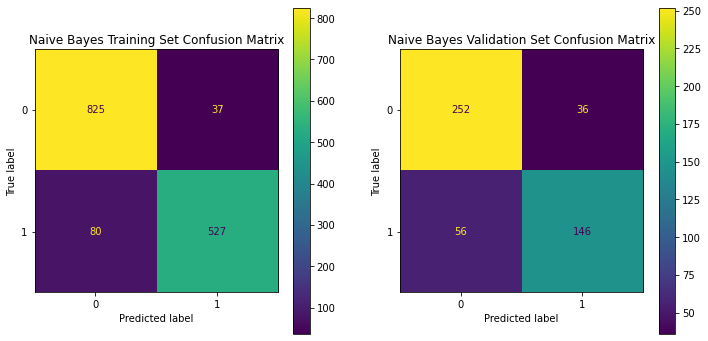

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_train5, y_train5, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicNB, tfidf_X_valid5, y_valid5, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set Confusion Matrix")
axs[1].set_title("Naive Bayes Validation Set Confusion Matrix")
plt.show()

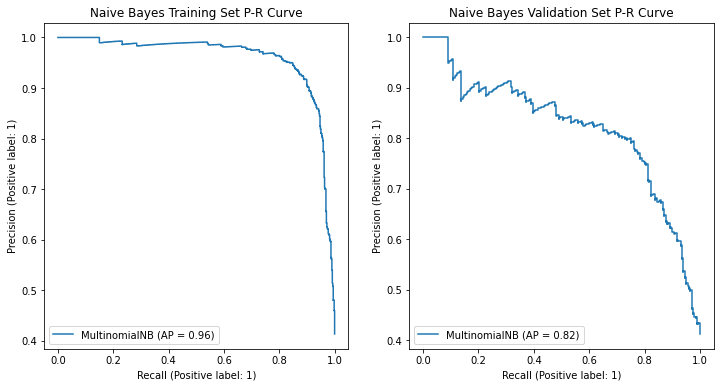

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_train5, y_train5, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicNB, tfidf_X_valid5, y_valid5, ax=axs[1])
axs[0].set_title("Naive Bayes Training Set P-R Curve")
axs[1].set_title("Naive Bayes Validation Set P-R Curve")
plt.show()

In [40]:
basicSVM = SVC(kernel='linear')
basicSVM.fit(tfidf_X_train2, y_train2)
print("SVM Regression Training Set F1 Score:", f1_score(y_train2, basicSVM.predict(tfidf_X_train2)))
print("SVM Validation Set F1 Score:", f1_score(y_valid2, basicSVM.predict(tfidf_X_valid2)))

SVM Regression Training Set F1 Score: 0.9267461669505962
SVM Validation Set F1 Score: 0.7557840616966581


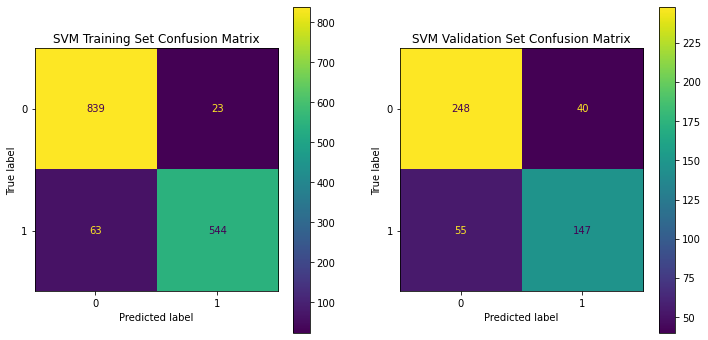

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicSVM, tfidf_X_train2, y_train2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicSVM, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("SVM Training Set Confusion Matrix")
axs[1].set_title("SVM Validation Set Confusion Matrix")
plt.show()

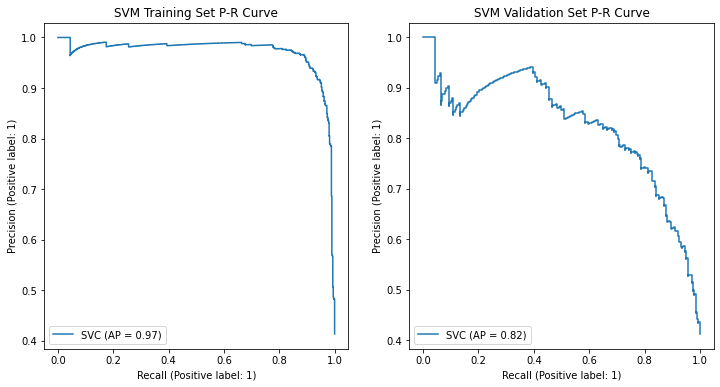

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicSVM, tfidf_X_train2, y_train2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicSVM, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("SVM Training Set P-R Curve")
axs[1].set_title("SVM Validation Set P-R Curve")
plt.show()

In [43]:
basicLR = LogisticRegression()
basicLR.fit(tfidf_X_train2, y_train2)
print("Logistic Regression Training Set F1 Score:", f1_score(y_train2, basicLR.predict(tfidf_X_train2)))
print("Logistic Regression Validation Set F1 Score:", f1_score(y_valid2, basicLR.predict(tfidf_X_valid2)))

Logistic Regression Training Set F1 Score: 0.8790035587188612
Logistic Regression Validation Set F1 Score: 0.7292225201072385


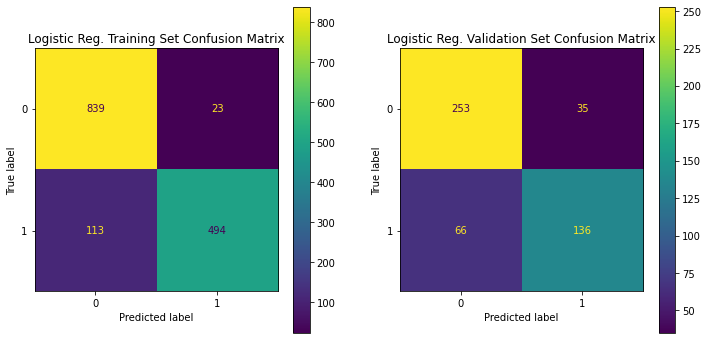

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(basicLR, tfidf_X_train2, y_train2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(basicLR, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("Logistic Reg. Training Set Confusion Matrix")
axs[1].set_title("Logistic Reg. Validation Set Confusion Matrix")
plt.show()

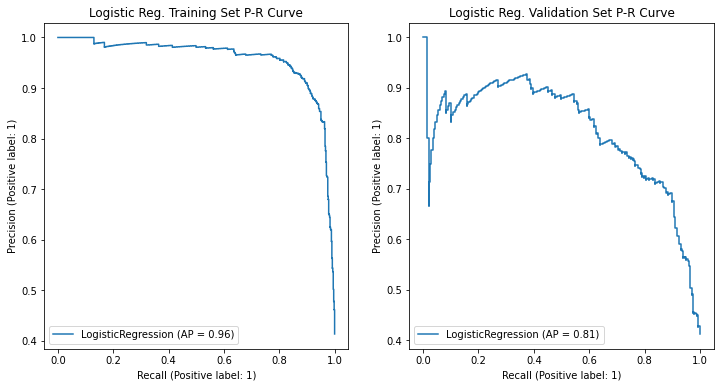

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(basicLR, tfidf_X_train2, y_train2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(basicLR, tfidf_X_valid2, y_valid2, ax=axs[1])
axs[0].set_title("Logistic Reg. Training Set P-R Curve")
axs[1].set_title("Logistic Reg. Validation Set P-R Curve")
plt.show()

In [46]:
tfidf_X_cv = tfidf.fit_transform(X2)
tfidf_X_test = tfidf.transform(X_test2)
NBtuner = GridSearchCV(MultinomialNB(), param_grid={"alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                      "fit_prior": [True, False],
                                                      "class_prior": [[0, 1], [.1, .9], [.2, .8], [.3, .7], [.6, .4], [.7, .3], [.8, .2], [.9, .1], [1, 0]]},
                                                      cv=8, n_jobs=-1, scoring="f1")
NBtuner.fit(tfidf_X_cv, y2)
print(NBtuner.best_params_)
print(NBtuner.best_score_)

{'alpha': 0.2, 'class_prior': [0.6, 0.4], 'fit_prior': True}
0.7673009639809817


In [47]:
tunedNB = NBtuner.best_estimator_
tunedNB.fit(tfidf_X_cv, y2)
print("Tuned NB Training Set F1 Score:", f1_score(y2, tunedNB.predict(tfidf_X_cv)))
print("Tuned NB Test Set F1 Score:", f1_score(y_test2, tunedNB.predict(tfidf_X_test)))

Tuned NB Training Set F1 Score: 0.915617128463476
Tuned NB Test Set F1 Score: 0.7873303167420813


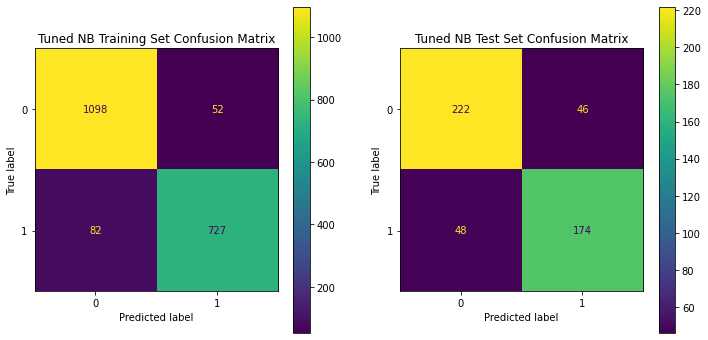

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(tunedNB, tfidf_X_cv, y2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(tunedNB, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned NB Training Set Confusion Matrix")
axs[1].set_title("Tuned NB Test Set Confusion Matrix")
plt.show()

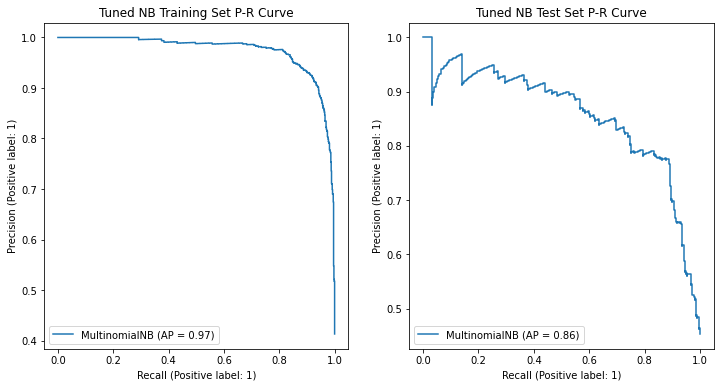

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(tunedNB, tfidf_X_cv, y2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(tunedNB, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned NB Training Set P-R Curve")
axs[1].set_title("Tuned NB Test Set P-R Curve")
plt.show()

In [50]:
SVMtuner = GridSearchCV(SVC(), param_grid={"C": [0.01, 0.1, 1, 10, 100],
                                                      "kernel": ["linear", "poly", "rbf", "sigmoid"],
                                                      "class_weight": ["balanced", None]},
                                                      cv=8, n_jobs=-1, scoring="f1")
SVMtuner.fit(tfidf_X_cv, y2)
print(SVMtuner.best_params_)
print(SVMtuner.best_score_)

{'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.7774218647255073


In [51]:
tunedSVM = SVMtuner.best_estimator_
tunedSVM.fit(tfidf_X_cv, y2)
print("Tuned SVM Training Set F1 Score:", f1_score(y2, tunedSVM.predict(tfidf_X_cv)))
print("Tuned SVM Test Set F1 Score:", f1_score(y_test2, tunedSVM.predict(tfidf_X_test)))

Tuned SVM Training Set F1 Score: 0.9243902439024391
Tuned SVM Test Set F1 Score: 0.8141592920353983


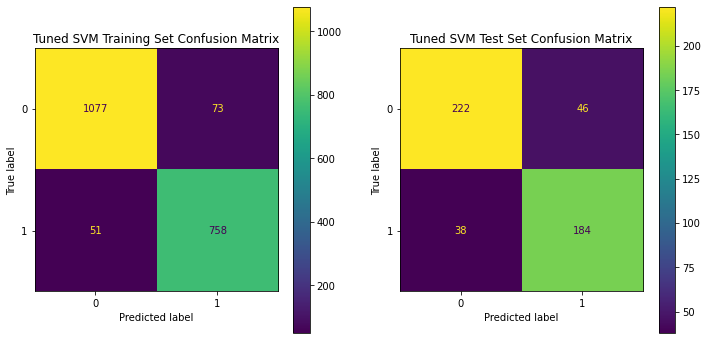

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(tunedSVM, tfidf_X_cv, y2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(tunedSVM, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned SVM Training Set Confusion Matrix")
axs[1].set_title("Tuned SVM Test Set Confusion Matrix")
plt.show()

In [60]:
print(classification_report(y2, tunedSVM.predict(tfidf_X_cv)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1150
           1       0.91      0.94      0.92       809

    accuracy                           0.94      1959
   macro avg       0.93      0.94      0.93      1959
weighted avg       0.94      0.94      0.94      1959



In [61]:
print(classification_report(y_test2, tunedSVM.predict(tfidf_X_test)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       268
           1       0.80      0.83      0.81       222

    accuracy                           0.83       490
   macro avg       0.83      0.83      0.83       490
weighted avg       0.83      0.83      0.83       490



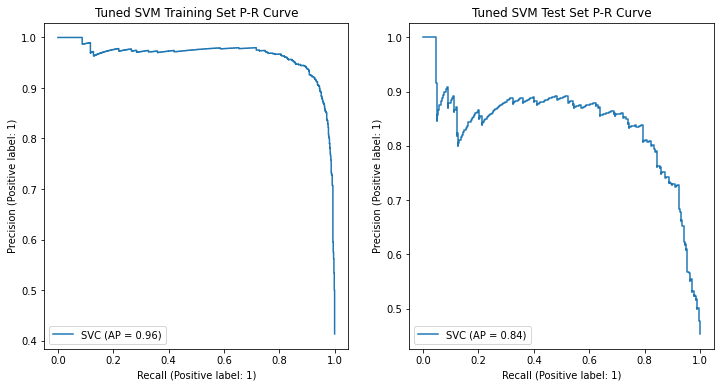

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(tunedSVM, tfidf_X_cv, y2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(tunedSVM, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned SVM Training Set P-R Curve")
axs[1].set_title("Tuned SVM Test Set P-R Curve")
plt.show()

In [56]:
LRtuner = GridSearchCV(LogisticRegression(), param_grid={"C": [0.01, 0.1, 1, 10, 100],
                                                      "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                                      "class_weight": ["balanced", None]},
                                                      cv=8, n_jobs=-1, scoring="f1")
LRtuner.fit(tfidf_X_cv, y2)
print(LRtuner.best_params_)
print(LRtuner.best_score_)

{'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}
0.7803029639710999


In [57]:
tunedLR = LRtuner.best_estimator_
tunedLR.fit(tfidf_X_cv, y2)
print("Tuned LR Training Set F1 Score:", f1_score(y2, tunedLR.predict(tfidf_X_cv)))
print("Tuned LR Test Set F1 Score:", f1_score(y_test2, tunedLR.predict(tfidf_X_test)))

Tuned LR Training Set F1 Score: 0.9485160508782556
Tuned LR Test Set F1 Score: 0.801762114537445


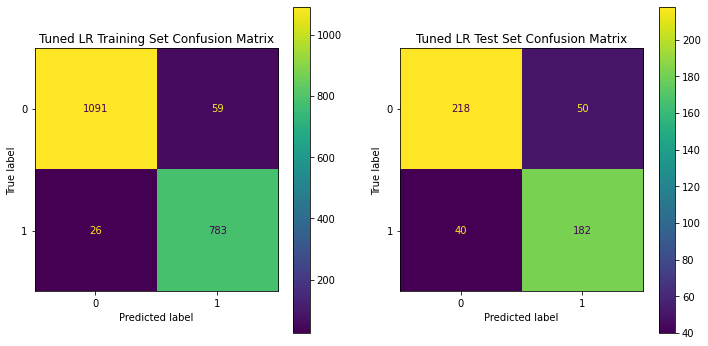

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(tunedLR, tfidf_X_cv, y2, ax=axs[0])
ConfusionMatrixDisplay.from_estimator(tunedLR, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned LR Training Set Confusion Matrix")
axs[1].set_title("Tuned LR Test Set Confusion Matrix")
plt.show()

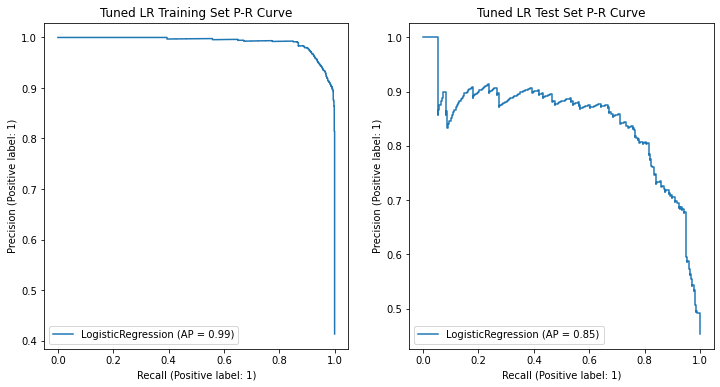

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
PrecisionRecallDisplay.from_estimator(tunedLR, tfidf_X_cv, y2, ax=axs[0])
PrecisionRecallDisplay.from_estimator(tunedLR, tfidf_X_test, y_test2, ax=axs[1])
axs[0].set_title("Tuned LR Training Set P-R Curve")
axs[1].set_title("Tuned LR Test Set P-R Curve")
plt.show()